# Projeto Python ML: Analise e Previsões

**Case**: Score de Crédito dos Clientes

definir o score de crédito dos clientes.

Preciso analisar todos os clientes do banco e com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom.

# **Base de Dados**

In [1]:
import pandas as pd
tabela = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python IA: Inteligencia Artificial e Previsões/clientes.csv')
display(tabela)
tabela.head()

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


# **Limpeza da Base**

In [2]:
#Limpeza dos Dados
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

# **Converti os objects para numeros Inteiros**

In [3]:
#Converti os tipos de dados objetos em Numeros
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()

for coluna in tabela.columns:
  if tabela[coluna].dtype == 'object' and coluna != 'score_credito':
    tabela[coluna] = codificador.fit_transform(tabela[coluna])

tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

# **IA**

In [12]:
#colunas que vão ser usadas para treinar a IA

x = tabela.drop(columns=['score_credito', 'id_cliente'])
y = tabela['score_credito']
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
#Teste modelos de IA, Treinar

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

arvore_decisao = RandomForestClassifier()
knn = KNeighborsClassifier()

arvore_decisao.fit(x_treino, y_treino)
knn.fit(x_treino, y_treino)


KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score

previsao_arvore = arvore_decisao.predict(x_teste)
previsao_knn = knn.predict(x_teste)

print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))

0.8248666666666666
0.7324


Arvore de decisão = **82.7%**

KNN = **73.3%**

# **Novas Previsões**

In [7]:
#Previsões para a tabela nova
tabela_novos_clientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python IA: Inteligencia Artificial e Previsões/novos_clientes.csv')

display(tabela_novos_clientes)



,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


In [15]:
from sklearn.preprocessing import LabelEncoder

codificador2 = LabelEncoder()

for coluna in tabela_novos_clientes.columns:
  if tabela_novos_clientes[coluna].dtype == 'object' and coluna != 'score_credito':
    tabela_novos_clientes[coluna] = codificador2.fit_transform(tabela_novos_clientes[coluna])

tabela_novos_clientes.info()

previsoes = arvore_decisao.predict(tabela_novos_clientes)
print(previsoes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       3 non-null      int64  
 1   idade                     3 non-null      float64
 2   profissao                 3 non-null      int64  
 3   salario_anual             3 non-null      float64
 4   num_contas                3 non-null      float64
 5   num_cartoes               3 non-null      float64
 6   juros_emprestimo          3 non-null      float64
 7   num_emprestimos           3 non-null      float64
 8   dias_atraso               3 non-null      float64
 9   num_pagamentos_atrasados  3 non-null      float64
 10  num_verificacoes_credito  3 non-null      float64
 11  mix_credito               3 non-null      int64  
 12  divida_total              3 non-null      float64
 13  taxa_uso_credito          3 non-null      float64
 14  idade_historic

# **Importancia de cada coluna para a previsão**

In [16]:
# importancia de cada coluna para o resulltado do score
colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=arvore_decisao.feature_importances_)
importancia = importancia * 100
print(importancia)

                                  0
mes                        4.030418
idade                      4.222853
profissao                  3.273391
salario_anual              5.019895
num_contas                 3.562731
num_cartoes                4.298766
juros_emprestimo           7.830349
num_emprestimos            2.767350
dias_atraso                6.233822
num_pagamentos_atrasados   4.644210
num_verificacoes_credito   5.215121
mix_credito                8.356553
divida_total              11.794459
taxa_uso_credito           5.064652
idade_historico_credito    7.575266
investimento_mensal        4.825407
comportamento_pagamento    2.389302
saldo_final_mes            5.360800
emprestimo_carro           0.699593
emprestimo_casa            0.736235
emprestimo_pessoal         0.693886
emprestimo_credito         0.704410
emprestimo_estudantil      0.700528


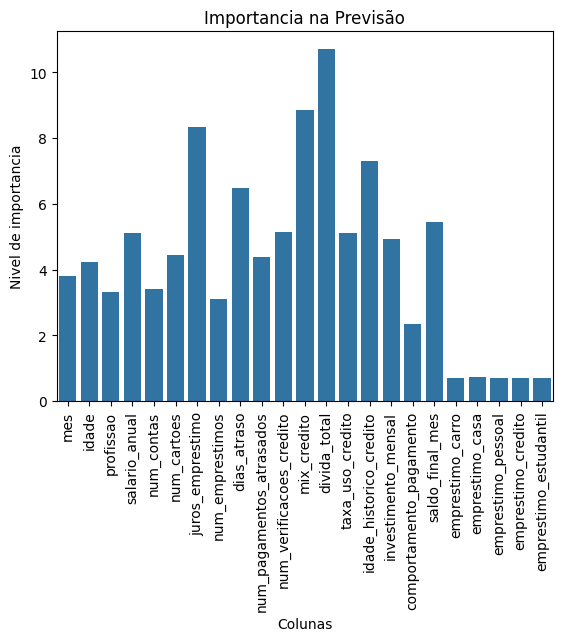

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

graf_importancia = sns.barplot(x = importancia.index, y=importancia[0])
graf_importancia.set(xlabel='Colunas')
graf_importancia.set(ylabel='Nivel de importancia')
graf_importancia.set(title = 'Importancia na Previsão')
plt.xticks(rotation=90)

plt.show(graf_importancia)

De acordo com o gráfico visto acima podemos afirmar que o critério mais importante na fase de analise de score do cliente é a sua divida total que influencia na decisão do seu score. Dito isso tambem vemos que os criterios menos importantes são os emprestimos feitos pelos clientes que tem quase 0% de influencia na decisão do seu score.
